# **Tratamento de atributos qualitativos**  
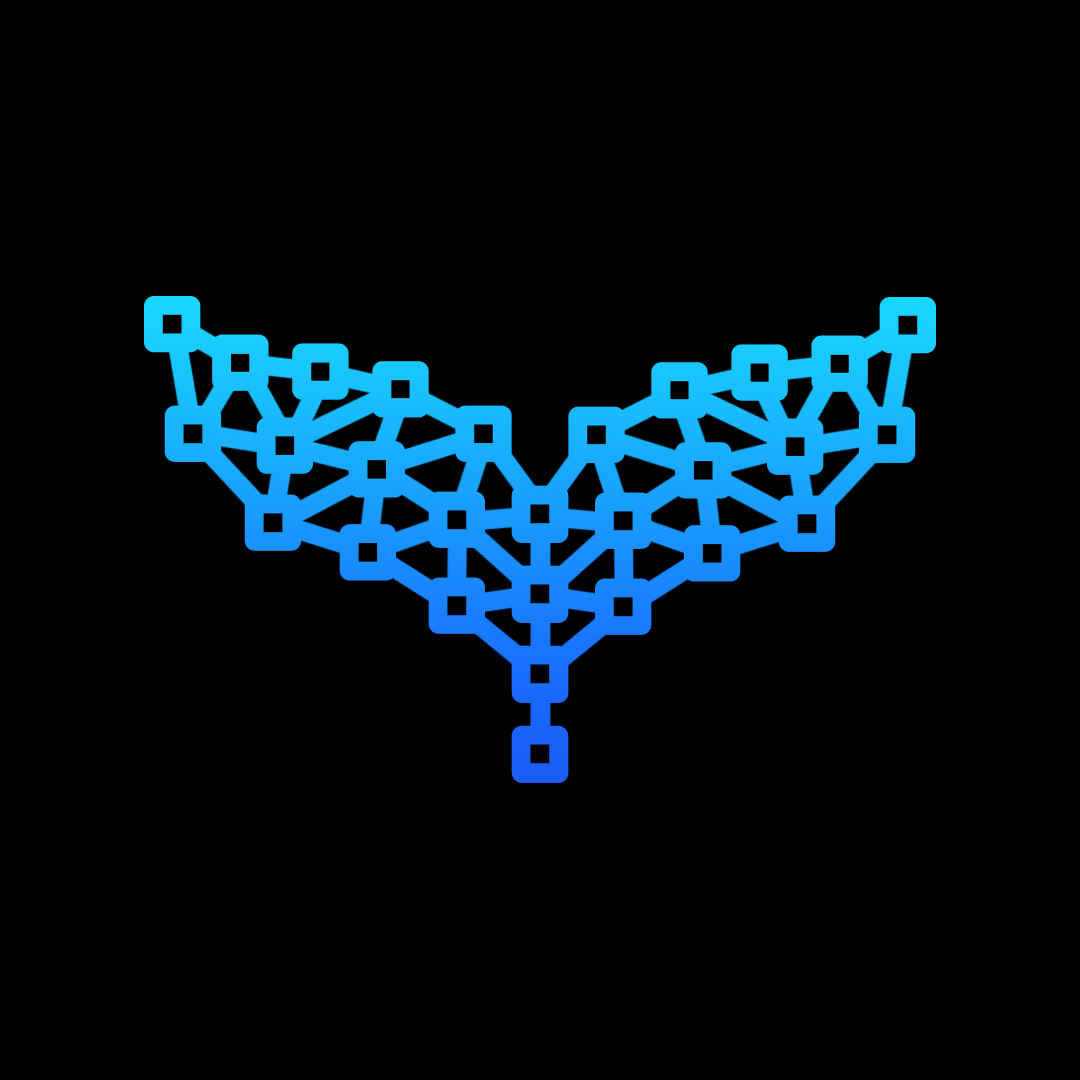


#### **Assuntos abordados:**

*   Expressões regulares
*Remoção de caracteres especiais 
*Remoção de stopwords
*Stemming e Lemmatization
*Label e OneHotEncoding




***

#### Importação das bibliotecas  
A biblioteca [NLTK](https://www.nltk.org/) possui uma vasta variedade de métodos e algoritmos para processamento da linguagem natural.

In [ ]:
import nltk # Uma das bibliotecas mais conhecidas de NLP (Natural Language Processing)
import re # Biblioteca responsável pelas expressões regulares
import pandas as pd 

In [ ]:
# Download dos pacotes da biblioteca que utilizaremos
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

***
# **Expressões regulares**  
<p>As expressões regulares ou regex basicamente fazem a extração de padrões definidos pelo programador em um corpo de texto. Uma vez definida a expressão, cada ocorrência do padrão será sinalizada.</p>
<p> Essas expressões são escritas de acordo com uma sintaxe pré-definida e compartilhada em grande parte com outras bibliotecas e linguagens de programação. Para auxiliar no processo de escrita das expressões, alguns visualizadores online podem ser utilizados, como o regex101.com</p>


## Sintaxe:


*  ### **"\d"** - Um número de apenas um dígito  

*ex: 0,1,2,3,4,5,6,7,8,9* 

* ### **"\W"** - Corresponde a qualquer caractere não-alfanumérico

*  ### **"\w"** - Corresponde a qualquer caractere alfanumérico

* ### **"\s"** - Corresponde ao caracter "espaço", "Tab" ou quebra de linha. 

*  ### **"[a-z]"** - Um único caractere compreendido entre "a" e "z"

* ### **"[aBcD]"** - Um caractere seja ele "a", "B", "c" ou "D". Respeitando letrais maiúsculas e minúsculas  

* ### **"(artes|biologia)** - Encontre a sequencia "artes" ou a sequencia "biologia"

* ### **"."** - Qualquer caractere único


#### Quantificadores  
* ### "**{N}**" - Determinado padrão é repetido "N" vezes  
  
*ex: (\d{6}) - Será um número que contém 6 dígitos*  

* ### **"{m,n}"** - Um número encontrado no mínimo "m" vezes e no máximo "n" vezes. 

*ex: (\d{2,5}) - Um número de no mínimo 2 dígitos ou de no máximo 5 dígitos.*

* ### **"*"** - Determinado padrão é encontrado 0 ou mais vezes vezes

*ex:* (\d**) - Um número será extraído enquanto o algorítmo não encontrar um caractere que não corresponda a um dígito.*

* ### **"+"** - Determinado padrão é encontrado uma ou mais vezes. 

* ### "**?**" - Verifica se determinado padrão existe no dado analisado.

*ex: ("\d?) - Existe um número decimal? Se sim, o padrão é sinalizado.*



Confira a [documentação](https://docs.python.org/pt-br/3.8/howto/regex.html) para mais detalhes sobre a sintaxe e o uso das expressões regulares.

#### Exemplo

Suponhamos que em determinada escola o número de matrícula de cada aluno é um número de 11 dígitos, um hífen e mais um dígito. Para encontrarmos esse padrão em um texto normal, usaremos a expressão regular: "\d{11}-\d". Além disso, buscaremos pelo padrão utilizado para idades, ou seja, um número e a palavra anos em seguida, que é reconhecido pela expressão: "(\d{1,3}\s?anos)". Um número de até três dígitos, um possível espaço e a palavra "anos".

In [ ]:
import re 

In [ ]:
matricula_regex = re.compile(r'(\d{11}-\d)')
idade_regex = re.compile(r'(\d{1,3}\s?anos)')

In [ ]:
texto = "Olá, meu nome é João e tenho 15 anos. Meu número de matrícula é 10984578901-5"

In [ ]:
matricula_regex.findall(texto)

['10984578901-5']

In [ ]:
idade_regex.findall(texto)

['15 anos']

***
# **Remoção de caracteres especiais**
Para um melhor desempenho dos algoritmos, faz-se necessária a remoção de pontuações, acentos e caracteres especiais. 

In [ ]:
import string
from unidecode import unidecode
import re

In [ ]:
def remove_punct(raw_str):
  sem_acentos = unidecode(raw_str) # Faz a remoção dos acentos
  sem_acentos_e_pontuacao = re.sub(r'[^\w\s]','',sem_acentos) # Através de expressões regulares, remove a pontuação.
  return sem_acentos_e_pontuacao

_Como vimos, as expressões regulares nos ajudam na manipulaçao dos padrões em atributos. Nesse caso, buscamos encontrar através da regex todas as ocorrências de coisas que não sejam números/ palavras. Uma vez encontrados os caracteres (pontuações) esses são removidos através da função re.sub()_

In [ ]:
print(remove_punct("Nós não podemos podemos deixar isso acontecer novamente! "))

Nos nao podemos podemos deixar isso acontecer 10


#**Remoção de stopwords** 
<p> A remoção de stopwords ou palavras vázias é de extrema importância para grande parte dos problemas envolvendo texto. Stopwords são palavras que pouco acrescentam em sentido no texto e/ou são muito repetidas. </p>
<p> Suponha que temos duas notícias, uma sobre futebol e outra sobre política e nosso objetivo é quantificar a similaridade entre eles. Sem a remoção de stopwords, nosso algoritmo veria uma vasta quantidade de palavras em comum nos dois textos, a exemplo das conjunções "e", "ou", "mas", "portanto", "porque". Isso conduz o modelo a enxergar uma similaridade excessiva onde não existe, por isso se torna tão essencial a remoção desses termos.</p>
<p>As stopwords variam de problema a problema, fazendo-se necessário, portanto, o conhecimento prévio do programador das palavras mais recorrentes em seus dados e averiguando quão significativas essas palavras são no contexto em que estão inseridas. No caso das notícias, temos por exemplo palavras que podem ser repetidas em ambos os textos, como "artigo", "hoje", "colunista". Mas que não denotam similaridade entre os dois textos e que portanto, devem ser removidas.</p>
<p> A biblioteca NLTK possui um conjunto de palavras pré-estabelecidas para diversas línguas, incluido o português. As stopwords são organizadas em formato de lista. Assim, cabe ao programador atualizar essa de maneira coerente com seu problema.




In [ ]:
stopwords_portugues = nltk.corpus.stopwords.words('portuguese')
print(stopwords_portugues)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
# Removendo stopwords
frase = 'Não levante a espada sobre a cabeça de quem te pediu perdão'
# Como vimos, as stopwords estão todas em minúsculo. Assim, faz-se necessário a conversão da nossa frase.
frase = frase.lower() 
print(frase)

não levante a espada sobre a cabeça de quem te pediu perdão


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
# A função word_tokenize quebra a frase em uma lista de palavras. Através dessa, verificaremos palavra por palavra se essa 
# está contida nas stopwords definidas.

In [ ]:
lista_palavras = word_tokenize(frase)
print(lista_palavras)

['não', 'levante', 'a', 'espada', 'sobre', 'a', 'cabeça', 'de', 'quem', 'te', 'pediu', 'perdão']


In [ ]:
frase_limpa = [palavra for palavra in lista_palavras if palavra not in stopwords_portugues]
print(frase_limpa)

['levante', 'espada', 'sobre', 'cabeça', 'pediu', 'perdão']


# **Stemming e Lemmatization** 
<p>&nbsp;</p>

##### **Stemming**
<p> O stemming atua "podando" as palavras de acordo com regras pré-estabelecidas de sufixos e prefixos. Assim, quando o algoritmo percebe a existência desses em uma palavra, ele corta a parte considerada excesso.</p> 
<p> Suponhamos que as regras estabelecidas sejam para a verificação da presença de "inho", "ando" e "indo". Num texto onde são encontradas as palavras "machucando", "despedindo", "cachorrinho", essas serão transformadas respectivamente em: "machuc", "desped" e "cachorr".</p>
<p> No exemplo dado a generalização foi bem sucedida, visto que o sentido dessa não foi distorcido. No entanto, em exemplos como "carinho", onde a palavra final seria "car", conseguimos ver a limitação desse algoritmo. Assim, cabe ao desenvolvedor analisar os resultados gerados pelas regras estabelecidas e avaliar se essa técnica é suficiente na resolução do seu problema.</p>   

*ex: "Studying -> Stud"*


<p>&nbsp;</p>  


In [ ]:
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer() # Instanciamos o stemmer

In [ ]:
lista_palavras = ['engineering','engine','program','programmer','university','universal','playing','played']

In [ ]:
for palavra in lista_palavras:
  print(palavra + " ========> ", stemmer.stem(palavra))

engineering ========>  engin
engine ========>  engin
program ========>  program
programmer ========>  programm
university ========>  univers
universal ========>  univers
playing ========>  play
played ========>  play


_É importante notar que o algoritmo de stemmização possui falhas na generalização, podendo prejudicar semânticamente o texto com as transformações feitas. O **Overstemming** ocorre quando ocorre um corte excessivo na palavra. Um exemplo é a remoção do diminutivo "inho", que faz sentido quando utilizada na palavra "cachorrinho" -> conduzindo para a forma "cachorr", mas não faz sentido quando aplicada a "carinho", pois conduz nos à expressão "car". No **Understemming**, o processo é o contrário, a remoção não nos conduz à uma boa generalização e palavras que deveriam compartilhar o mesmo "radical", geram "radicais" distintos._

##### **Lemmatization**
<p> A lemmatization atua de maneira mais técnica na redução da dimensionalidade. Enquanto o stemming não se preocupa em gerar palavras reais e sim limpá-las, baseando-se em conhecimento prévio da linguagem, a lemmatization associa a palavra do texto à palavra original, o "lemma". 

*ex: "Studying -> Study"*

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
for palavra in lista_palavras:
  print(palavra+ " ========> " , lemmatizer.lemmatize(palavra, pos ='v'))

engineering ========>  engineer
engine ========>  engine
program ========>  program
programmer ========>  programmer
university ========>  university
universal ========>  universal
playing ========>  play
played ========>  play


_É possível notar uma melhoria expressiva na capacidade de generalização da lemmatization em relação ao stemming. "Engineering" e "engine" não são reduzidas à mesma palavra, assim como "university" e "universal", como ocorria com o stemming._

# **LabelEncoding e OneHotEncoding**

Em muitas atividades de aprendizado de máquina ou ciência de dados, o conjunto de dados pode conter texto (strings) ou valores categóricos (basicamente valores não numéricos). Por exemplo, característica de cor tendo valores como vermelho, laranja, azul, branco e planos de refeição tendo valores como café da manhã, almoço, lanches. Diante disso, sabe-se que poucos algoritmos podem lidar muito bem com atributos qualitativos, assim, a maioria dos algoritmos espera valores numéricos para alcançar resultados coerentes.

Dessa forma, trouxemos pra vocês dois métodos para converter valores categóricos em valores numéricos: o One-Hot-Encoding e o Label-Encoder. Ambos os codificadores fazem parte da biblioteca SciKit-learn (uma das bibliotecas Python mais usadas) e são usados ​​para converter texto ou dados categóricos em dados numéricos que o modelo espera e com os quais tem um melhor desempenho.

# Label Encoding

Essa abordagem é muito simples e envolve a conversão de cada valor de uma coluna em um número. 

Assim, a priori importamos a biblioteca do pandas, a biblioteca do label encoding e o data frame a ser estudado.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('caminho_csv')

Assim, após verificar qual coluna será a que você quer transformar em numérica o primeiro passo é carregar a função label encoder e depois utilizar a função fit_transform para transformar os valores



In [ ]:
lbl_encode = LabelEncoder()
lbl_encode.fit_transform(df['COLUNA_ESCOLHIDA'])

Exemplo- Utilizando um Data Frame 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/form_IAparatodos.csv')
##Nesse momento abaixo apenas ocorreu a renomeação do nome das colunas para ficar mais fácil a visualização do DataFrame
rename_dict = {'Em uma empresa, o gerente precisou que os clientes fossem agrupados a partir de suas características, de forma que fossem direcionadas estratégias de marketing por perfil. Esse tipo de metodologia se enquadra em que tipo de aprendizagem de máquina?': 'Questão1',
               'A previsão ou saída de um modelo supervisionado pode ser de várias formas. Nesse contexto, em uma solução onde busco o valor do preço de um imóvel, devo utilizar um método que trate de problemas de que categoria?': 'Questão2', 'Uma das etapas mais importantes para o uso de métodos de aprendizagem de máquina é o pré-processamento. Nela, ajustamos, por exemplo, problemas com classes desbalanceadas. Quais técnicas são possíveis soluções para essa situação?' : 'Questão3',
               'Usando um neurônio artificial, conseguimos apenas criar classificadores que separam classes linearmente. Como podemos resolver isso utilizando redes neurais?': 'Questão4',
               'Em uma rede neural convolucional (CNN), usualmente temos imagens como entradas. Quantos valores de entradas recebe uma CNN se uma imagem de altura 10, largura 5 e com 3 canais (RGB) for utilizada? ' : 'Questão5',
               'Qual a principal diferença entre o modelo Bag of Words (BoW) e o TF-IDF?': 'Questão6', 'Em uma tarefa de diagnóstico automático de uma doença que pode ser fatal, você deve escolher um entre dois modelos. Qual modelo fará com que mais pessoas que realmente têm a doença sejam tratadas?' : 'Questão7',
               'Em um problema de classificação binário com classes balanceadas, você treinou um classificador com acurácia de 0,1%. O que você pode fazer diante dessa situação?' : 'Questão8',
               'Em uma tarefa de diagnóstico automático de uma doença que pode ser fatal, você deve escolher um entre dois modelos. Qual modelo fará com que mais pessoas que realmente têm a doença sejam tratadas?.1' : 'Questão9',
               }


df = df.rename(columns=rename_dict)
df.head()

,Timestamp,Score,Curso/Trabalho,Questão1,Questão2,Questão3,Questão4,Questão5,Questão6,Questão7,Questão8,Questão9
0,8/13/2020 16:19:09,5 / 9,Administração,Aprendizagem não supervisionada,Classificação,Redefinir o tamanho do conjunto de dados,Usando redes neurais com múltiplas camadas,150,O TF-IDF bonifica palavras que aparecem muitas...,Separar os dados em um conjunto de treinamento...,Inverter as predições do seu modelo. Como há a...,K-vizinhos mais próximos com 79% de acurácia e...
1,8/13/2020 16:20:00,8 / 9,Ciências Biológicas,Aprendizagem não supervisionada,Regressão,Redefinir o tamanho do conjunto de dados,Usando redes neurais com múltiplas camadas,150,O TF-IDF penaliza palavras que aparecem muitas...,Preparar um experimento usando validação cruza...,Inverter as predições do seu modelo. Como há a...,K-vizinhos mais próximos com 79% de acurácia e...
2,8/13/2020 16:20:48,2 / 9,Administração,Aprendizagem supervisionada,Regressão,Utilizar diferentes custos de classificação pa...,Usando a função de ativação sigmoide,45,O TF-IDF bonifica palavras que aparecem muitas...,Treinar vários modelos e compará-los usando a ...,Testar outros valores para os parâmetros do al...,K-vizinhos mais próximos com 79% de acurácia e...
3,8/13/2020 16:25:00,4 / 9,Analista redes sociais,Aprendizagem supervisionada,Regressão,Utilizar diferentes custos de classificação pa...,Usando a função de ativação sigmoide,45,O TF-IDF penaliza palavras que aparecem muitas...,Treinar uma árvore de decisão usando a base in...,Inverter as predições do seu modelo. Como há a...,K-vizinhos mais próximos com 79% de acurácia e...
4,8/13/2020 16:25:24,4 / 9,Biologia,Aprendizagem supervisionada,Otimização,Redefinir o tamanho do conjunto de dados,Usando redes neurais com múltiplas camadas,150,O TF-IDF penaliza palavras que aparecem muitas...,Treinar vários modelos e compará-los usando a ...,Testar outros valores para os parâmetros do al...,K-vizinhos mais próximos com 79% de acurácia e...


Agora transformamos os valores categoricos da coluna 'Questão1' em numéricos e montamos um array com isto

In [ ]:
lbl_encode = LabelEncoder()
lbl_encode.fit_transform(df['Questão1'])


array([0, 0, 3, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0,
       3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3,
       0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 1, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 2, 0, 2, 3, 0, 0, 0, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0,
       0, 1, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, 3])

Por fim mostramos a visualização de como estão sendo chamados cada nome

In [ ]:
df['Questão1_label'] = lbl_encode.fit_transform(df['Questão1'])
df['Questão1_label'].value_counts()

0    139
3    115
2      6
1      4
Name: Questão1_label, dtype: int64

# OneHotEncoding

Embora o Label encoding seja direto, ele tem a desvantagem de que os valores numéricos podem ser mal interpretados por algoritmos como tendo algum tipo de hierarquia / ordem neles. Esse problema é abordado em outra abordagem alternativa comum chamada 'One-Hot Encoding'. Nessa estratégia, cada valor de categoria é convertido em uma nova coluna e atribuído um valor 1 ou 0 (notação para verdadeiro / falso) à coluna. Vamos considerar o exemplo anterior de tipo de ponte e níveis de segurança com codificação one-hot.

Assim, utilizando o mesmo exemplo anterior podemos importar a função get_dummies do pandas e separar em colunas com classificadores binários, demonstrando se há ou não aquela resposta em determinada linha

In [ ]:
add_colunas = pd.get_dummies(df['Questão1'])

Após gerar a nova coluna podemos integrá-la ao nosso DataFrame pela função join

In [ ]:
df.join(add_colunas)
df = df.join(add_colunas)

Dai para deixar mais organizado vamos dropar a antiga coluna 'questão 1' e deixar apenas as novas criadas. As colunas após a coluna "Questão1_label" correspondem às diferentes respostas possíveis, que com o label encoding, significavam 0,1,2 e 3. Com essa abordagem, cada resposta distinta vira uma coluna e quando sinalizada como entrada, atribui-se 1 enquanto as outras colunas de resposta (que não foram marcadas) recebem 0.

In [ ]:
df.drop(['Questão1'],axis=1, inplace = True )


In [ ]:
df

,Timestamp,Score,Curso/Trabalho,Questão2,Questão3,Questão4,Questão5,Questão6,Questão7,Questão8,Questão9,Questão1_label,Aprendizagem não supervisionada,Aprendizagem por reforço,Aprendizagem semisupervisionada,Aprendizagem supervisionada
0,8/13/2020 16:19:09,5 / 9,Administração,Classificação,Redefinir o tamanho do conjunto de dados,Usando redes neurais com múltiplas camadas,150,O TF-IDF bonifica palavras que aparecem muitas...,Separar os dados em um conjunto de treinamento...,Inverter as predições do seu modelo. Como há a...,K-vizinhos mais próximos com 79% de acurácia e...,0,1,0,0,0
1,8/13/2020 16:20:00,8 / 9,Ciências Biológicas,Regressão,Redefinir o tamanho do conjunto de dados,Usando redes neurais com múltiplas camadas,150,O TF-IDF penaliza palavras que aparecem muitas...,Preparar um experimento usando validação cruza...,Inverter as predições do seu modelo. Como há a...,K-vizinhos mais próximos com 79% de acurácia e...,0,1,0,0,0
2,8/13/2020 16:20:48,2 / 9,Administração,Regressão,Utilizar diferentes custos de classificação pa...,Usando a função de ativação sigmoide,45,O TF-IDF bonifica palavras que aparecem muitas...,Treinar vários modelos e compará-los usando a ...,Testar outros valores para os parâmetros do al...,K-vizinhos mais próximos com 79% de acurácia e...,3,0,0,0,1
3,8/13/2020 16:25:00,4 / 9,Analista redes sociais,Regressão,Utilizar diferentes custos de classificação pa...,Usando a função de ativação sigmoide,45,O TF-IDF penaliza palavras que aparecem muitas...,Treinar uma árvore de decisão usando a base in...,Inverter as predições do seu modelo. Como há a...,K-vizinhos mais próximos com 79% de acurácia e...,3,0,0,0,1
4,8/13/2020 16:25:24,4 / 9,Biologia,Otimização,Redefinir o tamanho do conjunto de dados,Usando redes neurais com múltiplas camadas,150,O TF-IDF penaliza palavras que aparecem muitas...,Treinar vários modelos e compará-los usando a ...,Testar outros valores para os parâmetros do al...,K-vizinhos mais próximos com 79% de acurácia e...,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,8/19/2020 18:01:54,5 / 9,Medicina,Classificação,"Redefinir o tamanho do conjunto de dados, Util...",Usando redes neurais com múltiplas camadas,150,O BoW cria vetores com mais dimensões que o TF...,Treinar vários modelos e compará-los usando a ...,Inverter as predições do seu modelo. Como há a...,K-vizinhos mais próximos com 79% de acurácia e...,3,0,0,0,1
260,8/21/2020 14:23:17,4 / 9,Ciências Contábeis,Regressão,"Redefinir o tamanho do conjunto de dados, Util...",Usando redes neurais com múltiplas camadas,150,O BoW cria vetores com mais dimensões que o TF...,Treinar vários modelos e compará-los usando a ...,Inverter as predições do seu modelo. Como há a...,Árvore de decisão com 93% de acurácia e cobert...,3,0,0,0,1
261,8/21/2020 18:27:25,7 / 9,Ciências de Dados e Inteligência Artificial,Regressão,"Redefinir o tamanho do conjunto de dados, Indu...",Usando redes neurais com múltiplas camadas,150,O TF-IDF penaliza palavras que aparecem muitas...,Separar os dados em um conjunto de treinamento...,Inverter as predições do seu modelo. Como há a...,K-vizinhos mais próximos com 79% de acurácia e...,0,1,0,0,0
262,8/24/2020 16:57:46,1 / 9,Administração,Otimização,Utilizar diferentes custos de classificação pa...,Não é possível resolver isso com redes neurais,150,O BoW cria vetores com menos dimensões que o T...,Treinar vários modelos e compará-los usando a ...,Testar outros valores para os parâmetros do al...,Árvore de decisão com 93% de acurácia e cobert...,3,0,0,0,1
